# ML Course 2 - Practice

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [210]:
dataset_raw = pd.read_csv('bank_churn.csv')
dataset_raw.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9030,9031,15799635,Arbour,577,Spain,Male,51,2,108867.00,1,0,0,140800.66,1
4261,4262,15607278,Romano,794,Spain,Female,46,8,134593.79,1,1,1,46386.37,0
1950,1951,15615456,Aleksandrova,680,France,Female,37,10,123806.28,1,1,0,81776.84,1
4706,4707,15574352,Clogstoun,850,France,Male,43,4,161256.53,1,1,1,140071.57,0
9335,9336,15739123,Mellor,737,Germany,Male,50,4,127552.85,2,1,0,4225.11,0
929,930,15590876,Knupp,764,France,Female,24,7,106234.02,1,0,0,115676.38,0
2735,2736,15791131,Chimaijem,551,Germany,Female,30,2,143340.44,1,1,0,145796.49,0
9161,9162,15750049,Steele,621,France,Male,40,10,163823.37,1,0,0,89519.47,0
1569,1570,15670823,Hsueh,651,Germany,Female,42,1,116646.76,1,1,0,44731.80,1
5731,5732,15800746,Watson,674,France,Male,45,7,144889.18,1,1,1,102591.90,1


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on his/her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice. Choose plots that provide interesting and meaningful information. 
Examples: distribution of the values within one feature, repartition of a feature depending on the target value, etc.  
For each graph, you must:
    - Plot the graph
    - Povide a title, axis labels and legend if applicable
    - Write a Markdown cell underneath to explain what insights you can draw from your graph. 
- Prepare the data set. Example: dropping irrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.
    - Explain why you drop a features
    - Explain your choice of encoding
   
Bonus: Feature Engineering!  
Enrich the dataset by creating new features for your model to learn on. It can be a combination of other features or combining with external information.

## Data exploration

### Distribution of customers exited the bank according to geography

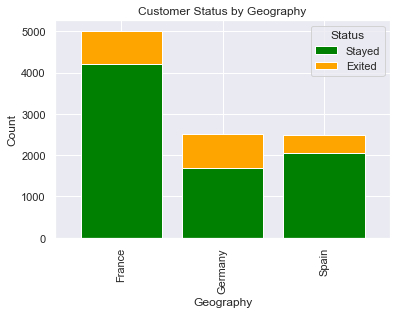

In [211]:
df_plot = dataset_raw.groupby(['Geography', 'Exited']).size().unstack().plot(kind='bar', stacked=True, color=['green', 'orange'], width=0.8)

plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title = 'Status', labels = ['Stayed' ,'Exited'])
plt.title('Customer Status by Geography')
plt.show()

Majority of customers are from France.

### Age distribution of customers who exited/not exited the bank 

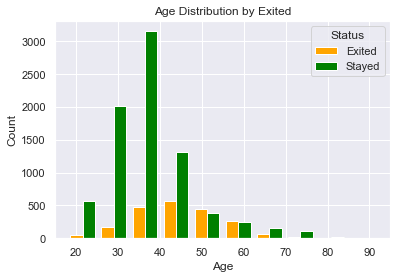

In [212]:
Exited = dataset_raw[dataset_raw['Exited'] == 1]['Age']
Stayed = dataset_raw[dataset_raw['Exited'] == 0]['Age']
plt.hist(x = [Exited, Stayed], color=['orange', 'green'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title = 'Status', labels = ['Exited', 'Stayed'])
plt.title('Age Distribution by Exited')
plt.show()

The older customers are churning more than the younger ones.

### Repartition of customers who exited/not exited the bank among men and women

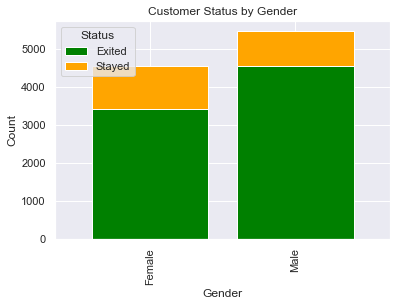

In [213]:
df_plot = dataset_raw.groupby(['Gender', 'Exited']).size().unstack().plot(kind='bar', stacked=True, color=['green', 'orange'], width=0.8)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Status', labels = ['Exited', 'Stayed'])
plt.title('Customer Status by Gender')
plt.show()

The proportion of female customers churning is greater than that of male customers.

### Correation between Balance and Exited

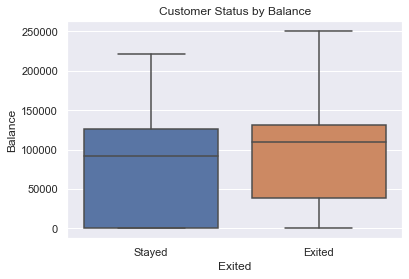

In [214]:
import seaborn as sns
sns.boxplot(x="Exited", y="Balance", data = dataset_raw)

plt.xlabel('Exited')
plt.xticks((0, 1), ('Stayed', 'Exited'))
plt.ylabel('Balance')
plt.title('Customer Status by Balance')
plt.show()

Customers with a higher balance churn more.

### Correation between EstimatedSalary and Exited

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

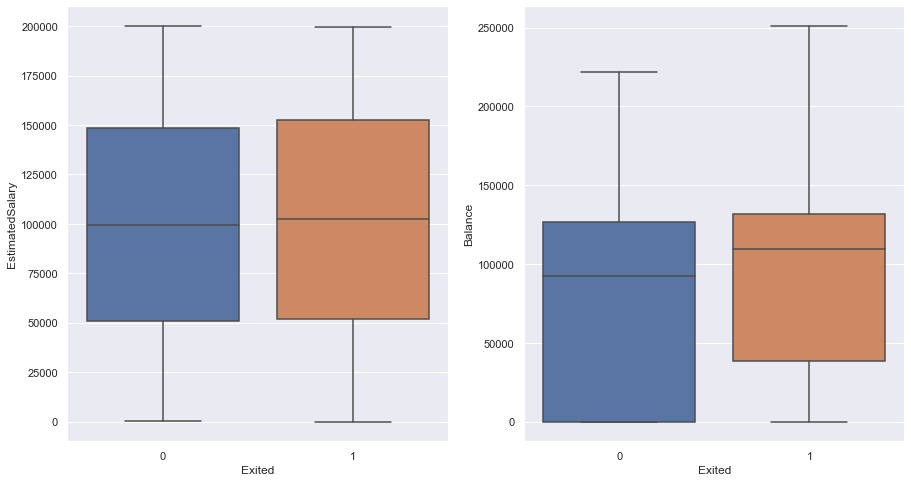

In [246]:
import seaborn as sns
fig, axarr = plt.subplots(1, 2, figsize = (15, 8))
sns.boxplot(x="Exited", y="EstimatedSalary", data = dataset_raw, ax =axarr[0])
sns.boxplot(x="Exited", y="Balance", data = dataset_raw, ax =axarr[1])

Customers with a higher salary churn more.

## Data Preprocessing

In [216]:
dataset_raw.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### Remove irrelevant data

In [217]:
dataset = dataset_raw.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
#Removing irrelevant columns and the ones we will not use as predictors
dataset.sample(n=5, random_state = 20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9957,633,France,Male,25,1,0.00,1,1,0,100598.98,0
1687,850,Spain,Male,37,4,137204.77,1,1,1,28865.59,0
2116,701,France,Male,44,7,0.00,2,1,0,23425.78,0
231,610,France,Male,40,0,0.00,2,1,0,62232.60,0
2780,778,Spain,Male,40,8,104291.41,2,1,1,117507.11,0


In [218]:
dataset.duplicated().sum()

0

In [219]:
dataset.info()#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Separate features and target variable

#### Target variable

In [220]:
y = dataset['Exited']
y[:4]

0    1
1    0
2    1
3    0
Name: Exited, dtype: int64

#### Features:

In [221]:
X = dataset.drop(['Exited'], axis=1)
#We need to analyze churn so we need different features of datasets of the specific column.
X.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63


### Variable encoding

In [222]:
dataset.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


#### Binary variables

In [223]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X[:4]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63


In [224]:
label_encoder.classes_

array(['Female', 'Male'], dtype=object)

### Categorical variables

In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

oh_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Geography'])], 
                               remainder='passthrough')
#'Geography' are categorical variables
X_onehot = oh_encoder.fit_transform(X)
print(X_onehot[:4])

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 6.9900000e+02 0.0000000e+00
  3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00
  0.0000000e+00 9.3826630e+04]]


In [239]:
oh_encoder.named_transformers_['encoder'].categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [247]:
X = pd.get_dummies(X_ord_encoded, columns=['Geography'], prefix=['is'])

NameError: name 'X_ord_encoded' is not defined

In [240]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


### Data set split

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
#Using similar data for training and testing to minimize the effects of data discrepancies 
#and better analyze the posibility of churning.

In [229]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)


In [230]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
651,720,France,1,52,7,0.00,1,1,1,14781.12
6560,577,France,0,32,1,0.00,2,1,0,9902.39
8974,706,Spain,0,43,1,0.00,2,1,0,31962.77
2348,824,France,1,45,3,129209.48,1,0,0,60151.77
5670,497,France,1,32,8,0.00,2,1,0,67364.42


### Scaling

In [231]:
X_train[['Age', 'Balance']][:5]

,Age,Balance
651,52,0.00
6560,32,0.00
8974,43,0.00
2348,45,129209.48
5670,32,0.00


In [232]:
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age', 'Balance']] = scaler.fit_transform(X_train[['Age', 'Balance']])
X_test[['Age', 'Balance']] = scaler.transform(X_test[['Age', 'Balance']])

In [233]:
X_train[['Age', 'Balance']][:5]

,Age,Balance
651,1.256181,-1.228601
6560,-0.659527,-1.228601
8974,0.394112,-1.228601
2348,0.585683,0.844319
5670,-0.659527,-1.228601


In [234]:
scaler = StandardScaler()
X_train[['Age', 'EstimatedSalary']] = scaler.fit_transform(X_train[['Age', 'EstimatedSalary']])
X_test[['Age', 'EstimatedSalary']] = scaler.transform(X_test[['Age', 'EstimatedSalary']])

In [235]:
scaler = StandardScaler()
X_train[['Age', 'CreditScore']] = scaler.fit_transform(X_train[['Age', 'CreditScore']])
X_test[['Age', 'CreditScore']] = scaler.transform(X_test[['Age', 'CreditScore']])

In [236]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
651,0.719980,France,1,1.256181,7,-1.228601,1,1,1,-1.480501
6560,-0.753272,France,0,-0.659527,1,-1.228601,2,1,0,-1.565230
8974,0.575745,Spain,0,0.394112,1,-1.228601,2,1,0,-1.182108
2348,1.791436,France,1,0.585683,3,0.844319,1,0,0,-0.692551
5670,-1.577469,France,1,-0.659527,8,-1.228601,2,1,0,-0.567289


Scaling data to normalize the range of independent variables or features of data